# Twitch Part 2: Visualize Data with Matplotlib

In [2]:
# Import packages to use:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [143]:
# read the data to be used

pop_games = pd.read_csv('popular_games.csv')
lol_viewers = pd.read_csv('LOL_viewers.csv')
viewers_time = pd.read_csv('viewers_time.csv')

In [144]:
# Preview each dataset

pop_games.head()

,game,No_of_viewers
0,League of Legends,241599
1,Dota 2,112106
2,Counter-Strike: Global Offensive,65104
3,DayZ,48150
4,Heroes of the Storm,44223


In [145]:
lol_viewers.head()

,country,No of LOL Viewers
0,US,111863
1,CA,15691
2,DE,12537
3,NaN,9668
4,GB,8077


In [146]:
viewers_time.head()

,Hour of the day,No of viewers
0,NaN,1
1,0.0,18200
2,1.0,17259
3,2.0,29343
4,3.0,24144


### Before visualisation let's clean the data set a bit



In [147]:
# We shall start by changing the NaN Entry at lol_viewers table 
# We see that there is a missing value in the column country
lol_viewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            155 non-null    object
 1   No of LOL Viewers  156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [148]:
# The missing value is locataed on the fourth row or the row at index 3
lol_viewers.country.isnull()

0      False
1      False
2      False
3       True
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: country, Length: 156, dtype: bool

In [149]:
# we will fill the value using .at() function 
lol_viewers.at[3,'country'] = 'Others'

In [150]:
# lets check if the value has been filled -- Yes, it has
lol_viewers.country.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: country, Length: 156, dtype: bool

Now for the final step of cleaning lets drop the first row of the viewers_time table:


In [151]:
viewers_time.drop([0],inplace=True)

In [152]:
viewers_time.head()

,Hour of the day,No of viewers
1,0.0,18200
2,1.0,17259
3,2.0,29343
4,3.0,24144
5,4.0,23358


Just before visualisation notice how the columns of dataset lol_viewers and viewers_time are written. This are not necessarily a huge deal but for great format sake's lets change them as follows 

In [153]:
lol_viewers.columns = lol_viewers.columns.str.replace(" ",'_')
viewers_time.columns = viewers_time.columns.str.replace(" ",'_')

In [154]:
lol_viewers.head()

,country,No_of_LOL_Viewers
0,US,111863
1,CA,15691
2,DE,12537
3,Others,9668
4,GB,8077


In [155]:
viewers_time.head()

,Hour_of_the_day,No_of_viewers
1,0.0,18200
2,1.0,17259
3,2.0,29343
4,3.0,24144
5,4.0,23358


## Great! Data is prepped now let's get to visualisation.

## Bar Graph on pop_games

In [156]:
pop_games = pop_games.head(10)

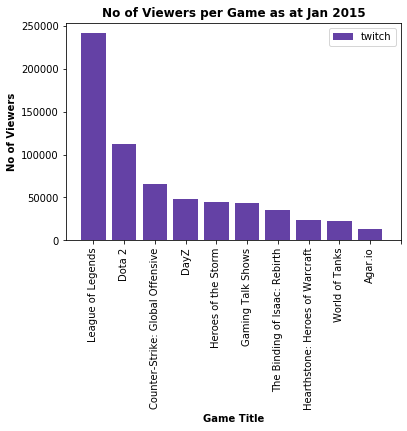

In [157]:
# Bar Graph: Featured Games
x = pop_games.game
ax = plt.subplot()
plt.bar(range(len(pop_games.game)),pop_games.No_of_viewers,color = '#6441a5',label = 'twitch')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(x,rotation = 90)
plt.xlabel('Game Title',weight = 'semibold')
plt.ylabel('No of Viewers',weight = 'semibold')
plt.title('No of Viewers per Game as at Jan 2015', weight = 'bold')
plt.legend()
plt.show()

## Pie Chart: League of Legends Viewers' Whereabouts

In [158]:
lol_viewers = lol_viewers.head(10)
lol_viewers

,country,No_of_LOL_Viewers
0,US,111863
1,CA,15691
2,DE,12537
3,Others,9668
4,GB,8077
5,TR,5404
6,AU,5211
7,SE,4047
8,NL,4014
9,DK,3378


In [159]:
labels = list(lol_viewers.country)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

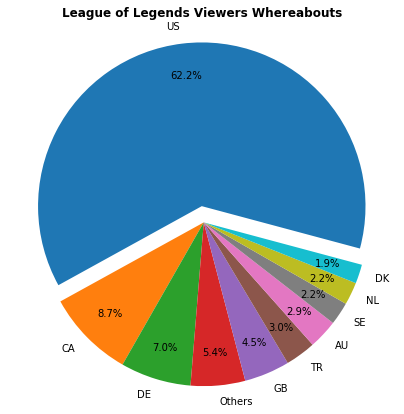

In [160]:
plt.figure(figsize=(7,7))
plt.pie(lol_viewers.No_of_LOL_Viewers,autopct='%0.1f%%',labels=labels,pctdistance=0.8,labeldistance=1.1,explode=explode,startangle=345)
plt.axis('equal')
plt.title('League of Legends Viewers Whereabouts',weight = 'bold')
#lt.legend(labels, loc="right")
plt.show()

## Line Graph: Time Series Analysis

In [161]:
x = list(viewers_time.Hour_of_the_day)
y = viewers_time.No_of_viewers
y_upper = [i + (i * 0.15) for i in y]
y_lower = [l -(l * 0.15) for l in y]

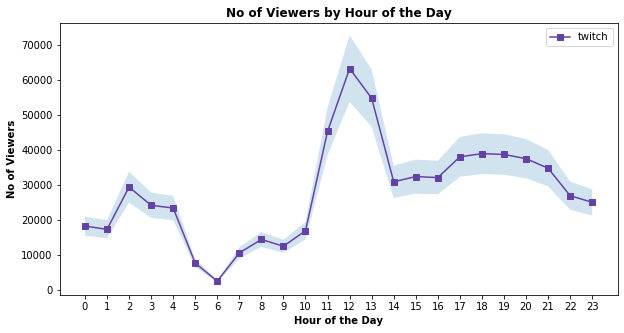

In [162]:
plt.figure(figsize=(10,5))
ax = plt.subplot()
plt.fill_between(range(len(x)),y_lower,y_upper,alpha = 0.2)
plt.plot(range(len(x)),y,color = '#6441a5',marker = 's',label = 'twitch')
ax.set_xticks(range(len(x)))
#ax.set_xticklabels(x)
plt.xlabel('Hour of the Day',weight = 'bold')
plt.ylabel('No of Viewers',weight = 'bold')
plt.title('No of Viewers by Hour of the Day',weight = 'bold')
plt.legend()
plt.show()